Изготвил: Росица Динкова Тодинова, ф.н. 71624, специалност Информационни системи, 4 курс

# Опсиание на проекта

Целта на проекта е да предостави модел, който предсказва дали при даден пациент има риск от сърдечно заболяване в рамките на 10 години. Dataset-a, който е използван, съдържа данни, събрани от сърдечно-съдови изследвания. Той се състои от 15 атрибута и 4240 записа.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Описание да dataset

In [2]:
heart_disease_dataset=pd.read_csv("framingham.csv")

In [3]:
heart_disease_dataset.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Dataset-a съдържа следните колони:

CATEGORICAL DATA:
    - male (Пол): Приема стойност 0 за female и 1 за male.
    - education (Образование): Приема стойности 1 за Some High School, 2 за High School или GED, 3 за Some College или Vocational School и 4 зая College
    - currentSmoker (Пушач): Приема стойности 0 за непушач и 1 за пушач
    - BPMeds (Лекарства за кръвно налягане): Приема стойност 0 в случай, че пациентът не приема лекарства за кръвно налягане и 1 - ако приема.
    - prevalentStroke (Предишен сърдечен удар): Приема стойност 0, ако пациентът не е получавал сърдечен удар преди и 1 - ако е.
    - prevalentHyp (Свръхчувствителност): Приема стойност 0, ако пациентът не е развивал свръхчувствителност преди и 1 - ако е.
    - diabetes (Диабет): Приема стойност 0, ако пациентът няма диабет и 1 - ако има.
NUMERICAL DATA:
    - age (Години): Когато е правено изследването
    - cigsPerDay (Брой цигари на ден): Средно
    - totChol (Ниво на холестерол): Измерва се в mg/dL
    - sysBP (Систолно кръвно налягане): Горна граница на кръвно налягане. Измерва се в mmHg.
    - diaBP (Диастолно кръвно налягане): Долна граница на кръвно налягане. Измерва с в mmHg.
    - BMI - Body Mass Index (Индекс на телесната маса): Пресмята се по следната формула - Weight (kg) / Height(meter-squared)
    - heartRate (Сърдечен ритъм): Измерва се в Beats/Min
    - glucose (Глюкоза): Измерва се в mg/dL.
VALUE TO PREDICT:
    - TenYearCHD () - Стойността, която трябва да се предскаже, приема стойност 0, ако няма шанс пациентът да развие сърдечно заболяване в близките 10 години и 1 - ако има.

# Data Exploration

In [4]:
heart_disease_dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
heart_disease_dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

От тук виждаме, че има само една характеристика, която има доста липсващи стойности - glucose. Също така. всички характеристики са сведени до числа - int и float, включително и categorical данните.

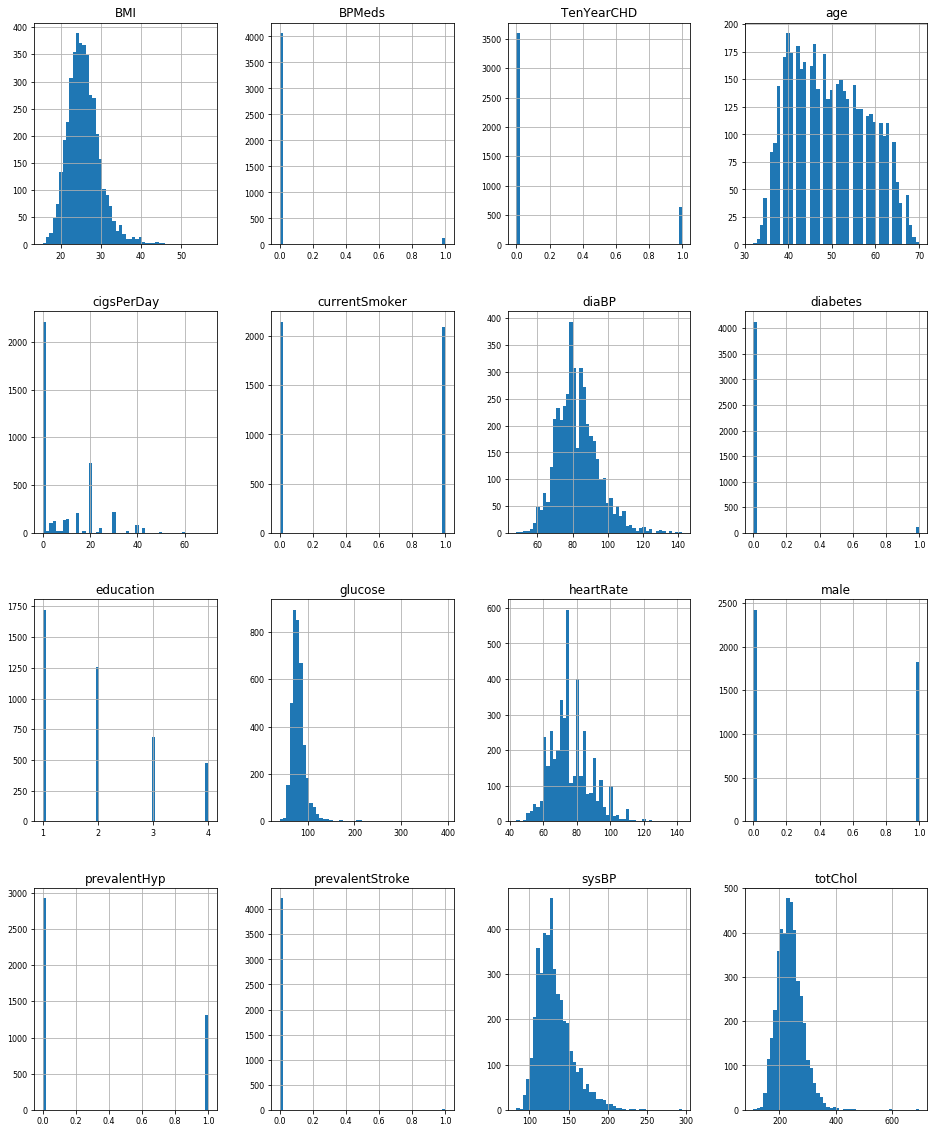

In [6]:
heart_disease_dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

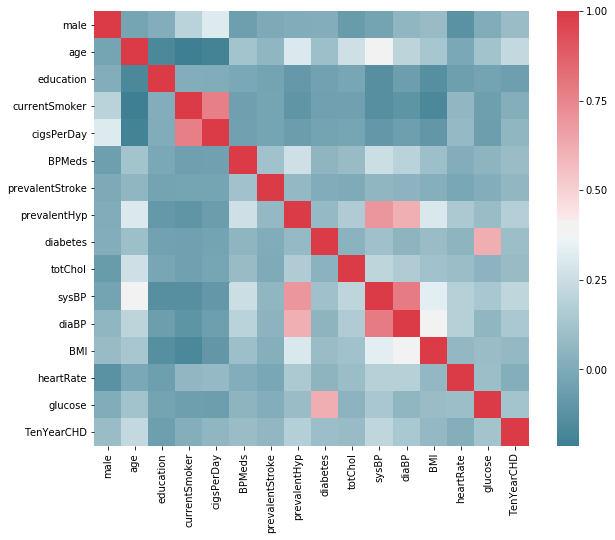

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = heart_disease_dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [8]:
features_correlation = heart_disease_dataset.corr()['TenYearCHD'][:-1]
golden_features_list = features_correlation[abs(features_correlation) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with TenYearCHD:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with TenYearCHD:
Series([], Name: TenYearCHD, dtype: float64)


In [9]:
features_correlation = heart_disease_dataset.corr()['TenYearCHD'][:-1]
golden_features_list = features_correlation[abs(features_correlation) > 0.2].sort_values(ascending=False)
print("There are {} not very strong correlated values with TenYearCHD:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 not very strong correlated values with TenYearCHD:
age      0.225408
sysBP    0.216374
Name: TenYearCHD, dtype: float64


Както може да се види, няма линейна зависимост между стойността, която трябва да предвидим и останалите характеристики. Това автоматично означава, че няма нужда да опитваме Линейна регресия. Най-силна корелация имаме между currentSmoker и cigsPerDay. Това, дали пациентът е развивал свръхчувствителност зависи от неговите долна и горна граница на кръвно налягане. Също така, това дали пациентът има диабет, зависи от глюкозата в кръвта му.

# Data Preparation - functions

На пръв поглед виждаме, че колоната Образование няма да допринесе много за обучаване на модела и може да бъде премахната.

In [10]:
def clean_unnecessary_attributes(heart_disease_dataset):
    heart_disease_dataset.drop(['education'],axis=1,inplace=True)

Ако пациент е непушач, то той изпушва по 0 цигари на ден средно. За това ще запълним всички празни cigsPerDay за непушачите с 0. За пушачите могат да бъдат запълнени със средния брой изпушени цигари на ден на всички пациенти.

In [11]:
def fill_empty_smoking_attributes(heart_disease_dataset):
    heart_disease_dataset.loc[heart_disease_dataset['currentSmoker'] == 0, 'cigsPerDay'] = heart_disease_dataset.loc[heart_disease_dataset['currentSmoker'] == 0, 'cigsPerDay'].fillna(0)
    heart_disease_dataset['cigsPerDay'].fillna(heart_disease_dataset['cigsPerDay'].mean(), inplace=True)

Всички останали numerical характеристики с празни стойности също могат да бъдат запълнени със средното аритметично на стойностите в съответната колона.

In [12]:
def fill_null(heart_disease_dataset):
    heart_disease_dataset['sysBP'].fillna(heart_disease_dataset['totChol'].mean(), inplace=True);
    heart_disease_dataset['diaBP'].fillna(heart_disease_dataset['totChol'].mean(), inplace=True);
    heart_disease_dataset['totChol'].fillna(heart_disease_dataset['totChol'].mean(), inplace=True);
    heart_disease_dataset['BMI'].fillna(heart_disease_dataset['BMI'].mean(), inplace=True);
    heart_disease_dataset['heartRate'].fillna(heart_disease_dataset['heartRate'].mean(), inplace=True);
    heart_disease_dataset['glucose'].fillna(heart_disease_dataset['glucose'].mean(), inplace=True);
    heart_disease_dataset.fillna(0, inplace=True);

За да разберем дали това е правилно решение, ще опитаме и с премахване на всички features, които имат празни стойности. 

In [13]:
def clear_empty_data(heart_disease_dataset):
    heart_disease_dataset.dropna(axis=0,inplace=True)

In [14]:
clean_unnecessary_attributes(heart_disease_dataset)
fill_empty_smoking_attributes(heart_disease_dataset)
fill_null(heart_disease_dataset)

Нека заредим още веднъж dataset-a и да премахнем редовете, които съдържат празни стойности, за да сравним с кой dataset моделите ще се държат по-добре.

In [15]:
hdd_no_empty=pd.read_csv("framingham.csv")
clear_empty_data(hdd_no_empty)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(heart_disease_dataset.iloc[:, :-1], heart_disease_dataset.iloc[:,-1], test_size=0.4, random_state=0)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(hdd_no_empty.iloc[:, :-1], hdd_no_empty.iloc[:,-1], test_size=0.4, random_state=0)

# Model building

Ще обучим няколко модела, като използваме Логистична регресия, DecisionTree класификатор, RandomForest класификатор, KNN. Както споменах по-горе, няма да изпробваме Линейна регресия заради липсата на линейна зависимост между данните. За да се извлече максималното от използваните алгоритми използваме hyperparameter optimization/tuning, като за целта използвам GridSearch - изпробват се всички комбинации с посочените параметри (време за кафе), както и RandomizedSearch - избират се произволни комбинации от параметри (ще я използвам за RandomForestClassifier); и се избира най-добрата на база оценка на модела.

## Logistic Regression

Като за начало ще намерим параметрите, с които ще можем да изсмучем максималното от модела ни - hyperparameter optimization. Ще използваме GridSearchCV, за да тестваме различни комбинации със следните параметри: C, penalty, tol.

In [17]:
parameters={"C":np.logspace(-3,3,10), "penalty":["l1","l2"], "tol":np.logspace(-3,3,10)}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,parameters,cv=10);
logreg_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",logreg_cv.best_params_)
print("Score with optimized parameters:",logreg_cv.best_score_)

Optimized hpyerparameters: {'penalty': 'l1', 'tol': 0.001, 'C': 10.0}
Score with optimized parameters: 0.85062893081761


In [18]:
def train_model_with_logistic_regression(X_train, y_train, X_test, y_test, params={}):
    model = LogisticRegression(**params);
    model.fit(X_train, y_train)
    print("Train score: " + str(model.score(X_train, y_train)))
    print("Test score: " + str(model.score(X_test, y_test)))
    return model.predict(X_test)

Да проверим какъв score ще получим върху двата dataset-a - единия със запълнените празни стойности и другия с премахнатите редове с празни стойности. Ще тестваме какъв score ще получим и с оптимизираните хиперпараметри, които получихме.

In [19]:
y_predicted = train_model_with_logistic_regression(X_train, y_train, X_test, y_test)

Train score: 0.8502358490566038
Test score: 0.8602594339622641


In [20]:
train_model_with_logistic_regression(X_train_e, y_train_e, X_test_e, y_test_e)

Train score: 0.8600729261622607
Test score: 0.8394808743169399


array([0, 0, 0, ..., 0, 0, 0])

Очевидно модела ни се справя по-добре с тестовите данни от първия dataset - този със запълнените празни стойности. При използването на dataset-a с премахнатите стойности виждаме и overfitting.

In [21]:
train_model_with_logistic_regression(X_train, y_train, X_test, y_test, logreg_cv.best_params_)

Train score: 0.8525943396226415
Test score: 0.8579009433962265


array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix при Logistic regression

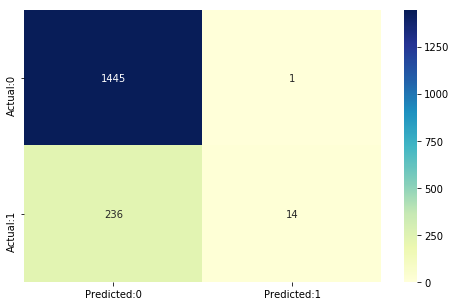

In [22]:
cm=confusion_matrix(y_test,y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [23]:
recall = cm[0, 0] / (cm[0, 0]+cm[1, 0])
print("Recall" + str(recall))

Recall0.8596073765615705


Както се вижда от матрицата, моделът ни се справя добре при предсказване, че пациента няма шанс от сърдечно заболяване в близките 10 години, когато наистина е така. Проблемът е при предсказване, че пациентът има шанс за сърдечно заболяване. Само в 14 от случаите, моделът е познал, че пациентът има шанс за сърдечно заболяване в близките 10 години. В останалите 236 случаи е объркал, което е фатално в този случай (по-добре да предскажем на здрав човек, че е болен, отколкото обратното). Това се дължи на използването на логистична регресия. Както видяхме в heatmap-a, стойността, която предсказваме не е много зависима от останалите характеристики и за това в случая логистичната регресия не ни върши много добра работа. Приличният score се дължи на това, че доста голяма част от данните в dataset-a показват, че пациент няма шанс за сърдечни заболявания в близките 10 години.

## Decision Tree Classification

При Decision Tree Classification отново ще направим hyperparameter optimization и ще обучим и тестваме модела.

In [24]:
parameters={"criterion":["gini", "entropy"], "splitter":["best","random"], "max_depth": range(1, 110, 10)}
dtree=DecisionTreeClassifier()
dtree_cv=GridSearchCV(dtree,parameters,cv=10);
dtree_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",dtree_cv.best_params_)
print("Score with optimized parameters:",dtree_cv.best_score_)

Optimized hpyerparameters: {'max_depth': 1, 'criterion': 'gini', 'splitter': 'best'}
Score with optimized parameters: 0.845125786163522


In [25]:
def train_model_with_decision_tree(X_train, y_train, X_test, y_test, params={}):
    model = DecisionTreeClassifier(**params).fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model.predict(X_test)

In [26]:
y_predicted = train_model_with_decision_tree(X_train, y_train, X_test, y_test)

Train score: 0.7405612363287595
Test score: 0.7570761756029845


In [27]:
train_model_with_decision_tree(X_train_e, y_train_e, X_test_e, y_test_e)

Train score: 0.7593404526117418
Test score: 0.7705035298517929


array([0, 1, 0, ..., 0, 1, 0])

In [28]:
y_predicted_opt = train_model_with_decision_tree(X_train, y_train, X_test, y_test, dtree_cv.best_params_)

Train score: 0.845126309113129
Test score: 0.8525941349991324


## Confusion matrix при Decision Tree Classification

Нека погледнем confusion матриците, когато не използваме hyperparameter optimization и когато - да. 

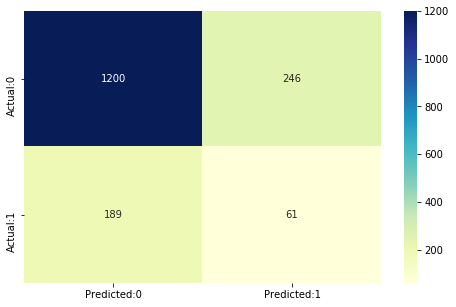

In [29]:
cm=confusion_matrix(y_test, y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

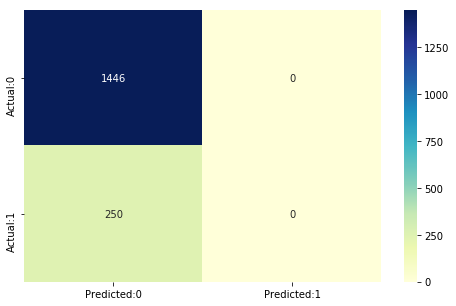

In [30]:
cm=confusion_matrix(y_test, y_predicted_opt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

В първия случай имаме подобрение в сравнение с използването на логистична регресия. Въпреки че моделът ни е определил за малко повече хора, че потенциално са застрашени от сърдечни заболявания, а това не е така, той е успял да предскаже за 70 човека, че имат шанс за сърдечно заболяване и е познал. Вече споменахме, че предпочитаме моделът ни да каже на здравия болен, отколкото на болния - здрав. За това, въпреки ниският score, имаме напредък. 
Странното тук е confusion матрицата при използване на hyperparameter optimization. С цел постигане на по-висок score, параметрите са така избрани, че моделът ни вече предсказва за всички, че нямат шанс от сърдечно заболяване.

## Random Forest Classification

При Random Forest Classification, за оптимизиране на хиперпараметрите, ще използваме методът RandomizedSearch, тъй като всевъзможните комбинации на избраните параметри са много и времето за изпробване и сравняване на всички е доста. Този метод не дава гаранция, че ще намери най-добрите параметри.

In [31]:
parameters={"n_estimators": range(1, 201, 10), "max_features":["auto","sqrt"], "max_depth":range(1, 101, 10), "min_samples_split":range(2,10,1), "min_samples_leaf":[1, 2, 4], "bootstrap":[True, False]}
rforest=RandomForestClassifier()
rforest_cv=RandomizedSearchCV(rforest,parameters,cv=10);
rforest_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",rforest_cv.best_params_)
print("Score with optimized parameters:",rforest_cv.best_score_)

Optimized hpyerparameters: {'max_features': 'sqrt', 'max_depth': 71, 'min_samples_split': 6, 'min_samples_leaf': 4, 'n_estimators': 121, 'bootstrap': True}
Score with optimized parameters: 0.8470911949685535


In [32]:
def train_model_with_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier().fit(X_train,y_train);
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))

In [33]:
train_model_with_random_forest(X_train, y_train, X_test, y_test)

Train score: 0.8388410191358695
Test score: 0.834325871941697


## Extra Trees Classification

In [34]:
def train_model_with_extra_trees(X_train, y_train, X_test, y_test):
    model = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))

In [35]:
train_model_with_extra_trees(X_train, y_train, X_test, y_test)

Train score: 0.8360866605819656
Test score: 0.8390352247093528


## KNeighbors Classification

In [36]:
def train_model_with_knn(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=20)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))

In [37]:
train_model_with_knn(X_train, y_train, X_test, y_test)

Train score: 0.845126309113129
Test score: 0.8514176644108972


In [38]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = DecisionTreeClassifier(max_depth=1, splitter='best', criterion='gini')
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
for clf, label in zip([clf2, clf3, clf1, eclf1], ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.837 (+/- 0.01) [Random Forest]
Accuracy: 0.845 (+/- 0.00) [Decision Tree]
Accuracy: 0.848 (+/- 0.01) [Logistic Regression]
Accuracy: 0.846 (+/- 0.00) [Ensemble]


In [39]:
for clf in [clf1, clf2, clf3]:
    vanilla_scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, 
       n_jobs=-1)
    
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.848, std: (+/-) 0.008 [LogisticRegression]
Mean of: 0.846, std: (+/-) 0.004 [Bagging LogisticRegression]

Mean of: 0.838, std: (+/-) 0.009 [RandomForestClassifier]
Mean of: 0.843, std: (+/-) 0.006 [Bagging RandomForestClassifier]

Mean of: 0.845, std: (+/-) 0.002 [DecisionTreeClassifier]
Mean of: 0.845, std: (+/-) 0.002 [Bagging DecisionTreeClassifier]

